In [5]:
import random
import pandas as pd

# Grid data: {multiplier, inhabitants}
grid = [
    [ [80, 6], [50, 4], [83, 7], [31, 2], [60, 4] ],  # Row A
    [ [89, 8], [10, 1], [37, 3], [70, 4], [90, 10] ], # Row B
    [ [17, 1], [40, 3], [73, 4], [100, 15], [20, 2] ],# Row C
    [ [41, 3], [79, 5], [23, 2], [47, 3], [30, 2] ]   # Row D
]

rows = ['A', 'B', 'C', 'D']
cols = [1, 2, 3, 4, 5]
n_simulations = 1000000
base_amount = 10

# Count how many times each cell was chosen
counts = [[0]*5 for _ in range(4)]

for _ in range(n_simulations):
    r = random.randint(0, 3)
    c = random.randint(0, 4)
    counts[r][c] += 1

data = []

for i in range(4):
    for j in range(5):
        multiplier, inhabitants = grid[i][j]
        open_percent = (counts[i][j] / n_simulations) * 100
        profit = (base_amount * multiplier) / (inhabitants + open_percent)
        cell_name = f"{rows[i]}{cols[j]}"
        data.append({
            "Cell": cell_name,
            "Multiplier": multiplier,
            "Inhabitants": inhabitants,
            "Open %": round(open_percent, 2),
            "Profit": round(profit, 2)
        })

df = pd.DataFrame(data)
df = df.sort_values(by="Profit", ascending=False).reset_index(drop=True)
df

,Cell,Multiplier,Inhabitants,Open %,Profit
0,C3,73,4,5.03,80.80
1,D2,79,5,5.00,79.02
2,B4,70,4,5.00,77.75
3,A1,80,6,4.99,72.78
4,A3,83,7,5.04,68.96
5,B1,89,8,5.01,68.39
6,A5,60,4,4.99,66.73
7,B5,90,10,5.03,59.88
8,D4,47,3,4.99,58.81
9,A2,50,4,5.02,55.42


In [1]:
import random
import pandas as pd
import numpy as np

# Grid: {multiplier, inhabitants}
grid = [
    [ [80, 6], [50, 4], [83, 7], [31, 2], [60, 4] ],
    [ [89, 8], [10, 1], [37, 3], [70, 4], [90, 10] ],
    [ [17, 1], [40, 3], [73, 4], [100, 15], [20, 2] ],
    [ [41, 3], [79, 5], [23, 2], [47, 3], [30, 2] ]
]

rows = ['A', 'B', 'C', 'D']
cols = [1, 2, 3, 4, 5]
base_amount = 10
n_simulations = 100000

# Flatten the grid to make indexing easier
flat_grid = [cell for row in grid for cell in row]
counts = [0] * len(flat_grid)

for _ in range(n_simulations):
    # Random guessed open percentages summing to 100
    guesses = np.random.dirichlet(np.ones(len(flat_grid))) * 100

    max_profit = -1
    chosen_idx = -1

    for idx, (cell, guess) in enumerate(zip(flat_grid, guesses)):
        multiplier, inhabitants = cell
        profit = (base_amount * multiplier) / (inhabitants + guess)
        if profit > max_profit:
            max_profit = profit
            chosen_idx = idx

    counts[chosen_idx] += 1

# Convert counts to actual open % and recompute real profit
data = []
for idx, (cell, count) in enumerate(zip(flat_grid, counts)):
    i, j = divmod(idx, 5)
    multiplier, inhabitants = cell
    actual_open_percent = (count / n_simulations) * 100
    profit = (base_amount * multiplier) / (inhabitants + actual_open_percent)
    cell_name = f"{rows[i]}{cols[j]}"
    data.append({
        "Cell": cell_name,
        "Multiplier": multiplier,
        "Inhabitants": inhabitants,
        "Open %": round(actual_open_percent, 2),
        "Profit": round(profit, 2)
    })

df = pd.DataFrame(data)
df = df.sort_values(by="Profit", ascending=False).reset_index(drop=True)
print(df)


   Cell  Multiplier  Inhabitants  Open %  Profit
0    B1          89            8    0.39  106.08
1    D3          23            2    0.19  104.88
2    A3          83            7    1.07  102.79
3    B2          10            1    0.01   99.30
4    C5          20            2    0.02   99.21
5    B3          37            3    0.80   97.42
6    A2          50            4    1.27   94.80
7    B5          90           10    0.00   89.96
8    C2          40            3    2.01   79.86
9    A1          80            6    4.22   78.29
10   D1          41            3    2.65   72.60
11   C4         100           15    0.00   66.67
12   A5          60            4    7.82   50.78
13   D5          30            2    4.06   49.51
14   A4          31            2    5.03   44.08
15   D4          47            3    8.13   42.22
16   D2          79            5   14.20   41.15
17   C1          17            1    4.33   31.92
18   B4          70            4   19.76   29.46
19   C3          73 

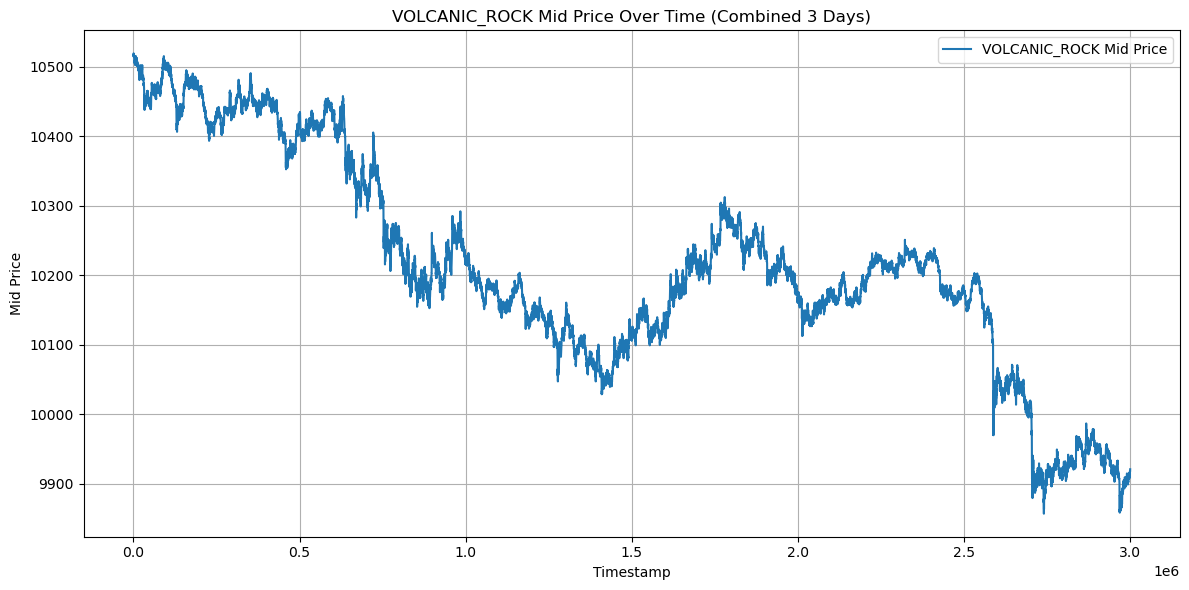

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Base path to files
base_path = r"C:\Users\yashr\Downloads\round-4-island-data-bottle\round-4-island-data-bottle"

# List of filenames and their day index
files = [
    ("prices_round_4_day_1.csv", 0),
    ("prices_round_4_day_2.csv", 1),
    ("prices_round_4_day_3.csv", 2),
]

dfs = []
offset = 0

for filename, day_index in files:
    path = os.path.join(base_path, filename)
    df = pd.read_csv(path, delimiter=';')
    
    # Filter for VOLCANIC_ROCK
    df = df[df['product'] == 'VOLCANIC_ROCK'].copy()
    df['timestamp'] = df['timestamp'].astype(int)
    
    # Apply offset to timestamp
    if dfs:
        offset = dfs[-1]['timestamp'].max() + 1  # start right after last max timestamp
    df['timestamp'] += offset

    dfs.append(df)

# Combine all
combined_df = pd.concat(dfs)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(combined_df['timestamp'], combined_df['mid_price'], label='VOLCANIC_ROCK Mid Price')
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("VOLCANIC_ROCK Mid Price Over Time (Combined 3 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

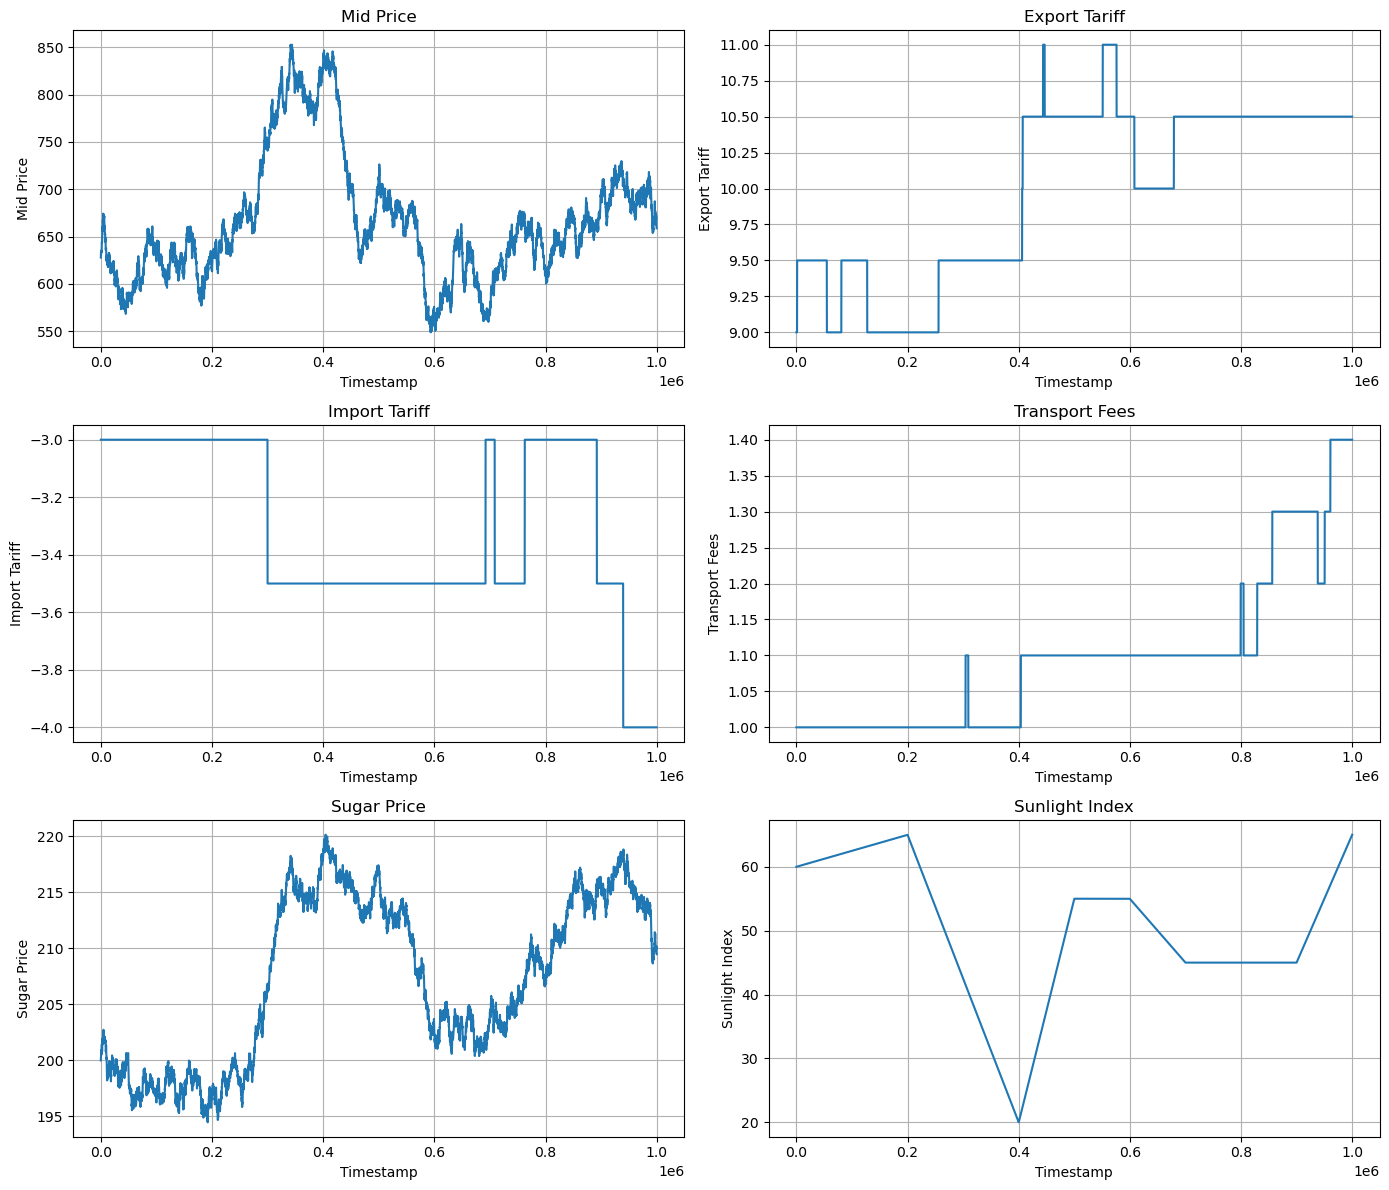

In [13]:
# Load observations file
observations_df = pd.read_csv(r"C:\Users\yashr\Downloads\round-4-island-data-bottle\round-4-island-data-bottle\observations_round_4_day_1.csv")  # remove delimiter

# Calculate mid price
observations_df['mid_price'] = (observations_df['bidPrice'] + observations_df['askPrice']) / 2
time = observations_df['timestamp']

# Metrics to plot
observation_series = {
    "Mid Price": observations_df['mid_price'],
    "Export Tariff": observations_df['exportTariff'],
    "Import Tariff": observations_df['importTariff'],
    "Transport Fees": observations_df['transportFees'],
    "Sugar Price": observations_df['sugarPrice'],
    "Sunlight Index": observations_df['sunlightIndex'],
}

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for ax, (title, series) in zip(axes, observation_series.items()):
    ax.plot(time, series)
    ax.set_title(title)
    ax.set_xlabel("Timestamp")
    ax.set_ylabel(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [58]:
import pandas as pd

# Load CSV
observations_df = pd.read_csv(r"C:\Users\yashr\Downloads\round-4-island-data-bottle\round-4-island-data-bottle\observations_round_4_day_3.csv")

# Compute mid price
observations_df['mid_price'] = (observations_df['bidPrice'] + observations_df['askPrice']) / 2

# Select relevant features
correlation_df1 = observations_df[[
    'sugarPrice',
    'mid_price',
    'sunlightIndex'
]]

correlation_df2 = observations_df[[
    'exportTariff',
    'importTariff',
    'transportFees'
]]
# Compute correlation matrix
correlation_matrix1 = correlation_df1.corr()

correlation_matrix2 = correlation_df2.corr()

# Show result
print("Correlation Matrix:")
print(correlation_matrix1)
print(correlation_matrix2)


Correlation Matrix:
               sugarPrice  mid_price  sunlightIndex
sugarPrice       1.000000   0.811935      -0.411802
mid_price        0.811935   1.000000      -0.693293
sunlightIndex   -0.411802  -0.693293       1.000000
               exportTariff  importTariff  transportFees
exportTariff       1.000000     -0.746906      -0.705563
importTariff      -0.746906      1.000000       0.872786
transportFees     -0.705563      0.872786       1.000000


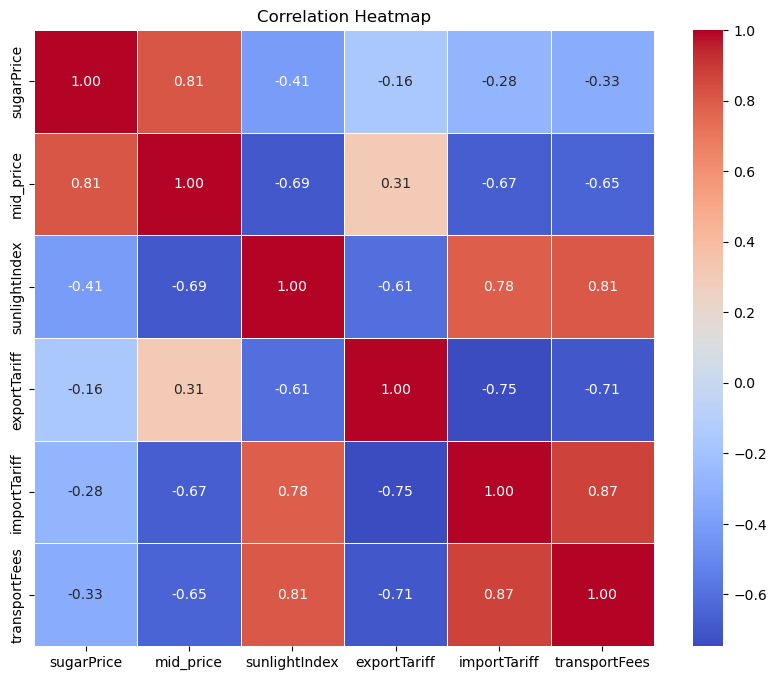

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
observations_df = pd.read_csv(r"C:\Users\yashr\Downloads\round-4-island-data-bottle\round-4-island-data-bottle\observations_round_4_day_3.csv")

# Compute mid price
observations_df['mid_price'] = (observations_df['bidPrice'] + observations_df['askPrice']) / 2

# Select relevant features
correlation_df = observations_df[[
    'sugarPrice',
    'mid_price',
    'sunlightIndex',
    'exportTariff',
    'importTariff',
    'transportFees'
]]

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
